#Predictive Analysis

Our goal is to predict wether a customer is going to cancel his/her Hotel Booking based on the data a hotel has about the customee. Our target variable is "is_cancelled". All analysis will be done keeping this in mind.

## Import Libraries, and Load the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('hotel_bookings.csv')

## Exploratory Data Analysis

In [3]:
sns.set(style = "darkgrid")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns.to_list()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Our Dataframe seems to have to types of Hotels, Resort and City. Let's look at some visuals related to this.

### Boxplots of the distribution of the Nights spent by Customer Type and Market Segment, by Hotel Type.

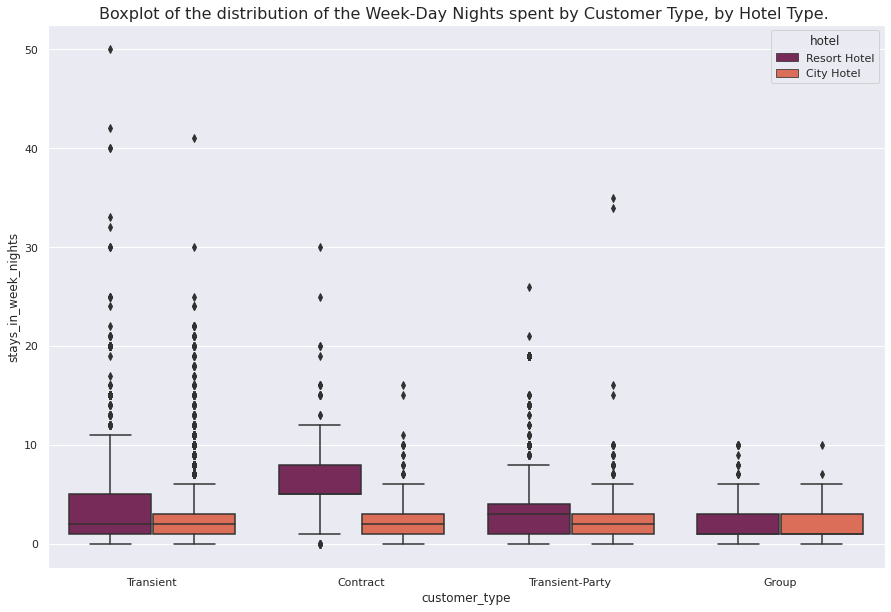

In [76]:
plt.figure(figsize = (15,10))
plt.title("Boxplot of the distribution of the Week-Day Nights spent by Customer Type, by Hotel Type. ", fontdict = {'fontsize':16})
sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'rocket')

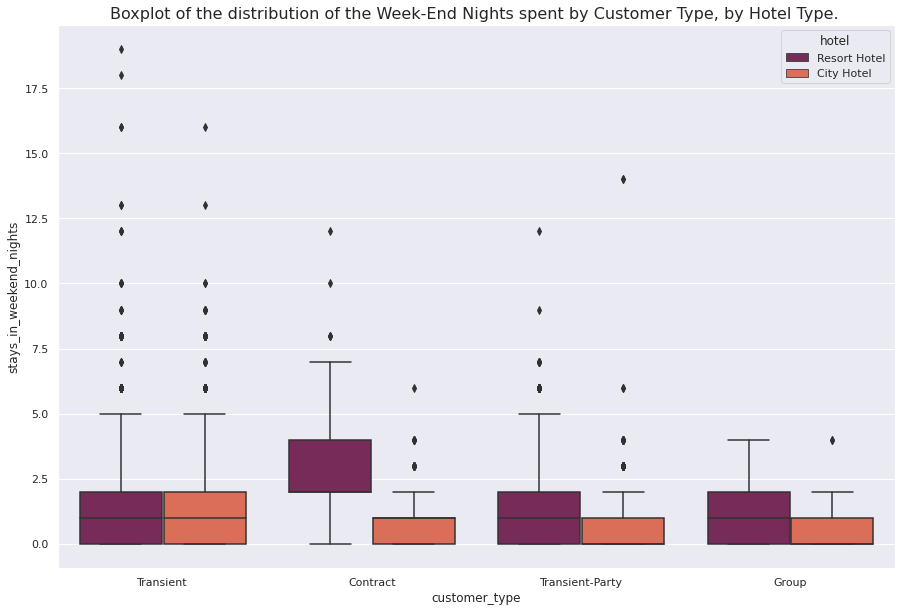

In [9]:
plt.figure(figsize = (15,10))
plt.title("Boxplot of the distribution of the Week-End Nights spent by Customer Type, by Hotel Type. ", fontdict = {'fontsize':16})
sns.boxplot(x = "customer_type", y = "stays_in_weekend_nights", data = df, hue = "hotel", palette = 'rocket')

Few key take aways:


*   In pretty much all cases, people tend to stay for longer in Resort Hotels than City Hotels. This makes sense.
*   Resort Hotels on contract seem to have customers who stay for the longest periods of time.
*   Most people book hotels for 5 days or less on week days, or 2 days or less on weekends implying most people stay in Hotels for a week at most, the sole exception being "Contract" Customers who book Resort Hotels.






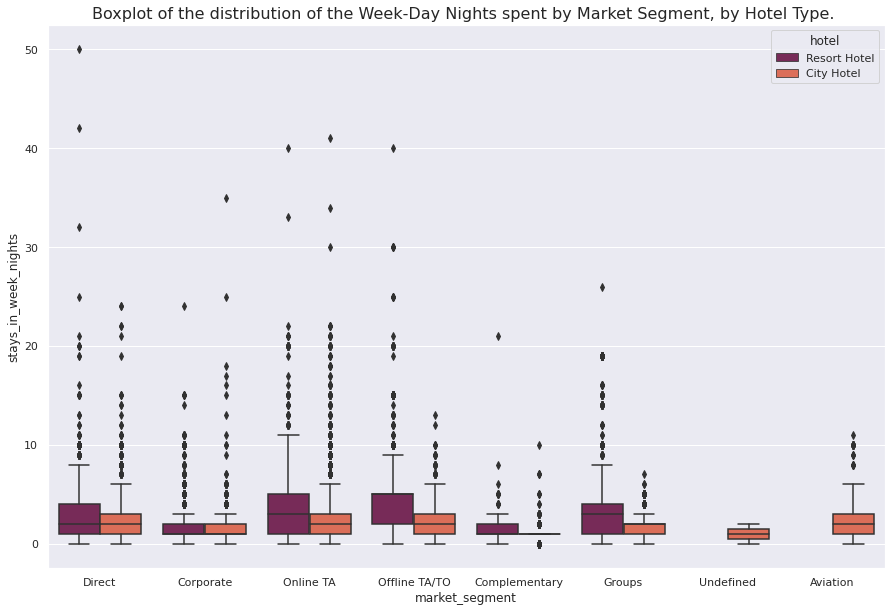

In [10]:
plt.figure(figsize = (15,10))
plt.title("Boxplot of the distribution of the Week-Day Nights spent by Market Segment, by Hotel Type. ", fontdict = {'fontsize':16})
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'rocket')

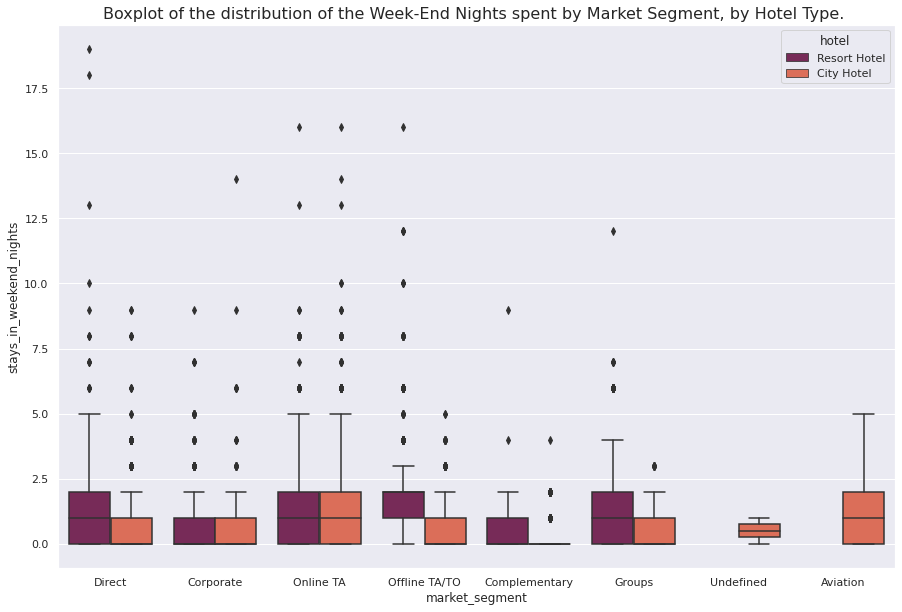

In [11]:
plt.figure(figsize = (15,10))
plt.title("Boxplot of the distribution of the Week-End Nights spent by Market Segment, by Hotel Type. ", fontdict = {'fontsize':16})
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = df, hue = "hotel", palette = 'rocket')

Peple from Avaition sector seem to say neraly exclusively in City Hotels. This is related to the fact that most Airports are in or close to Cities.

### Count plot of Distribution of Customer Type and Market Segment by Deposit Type

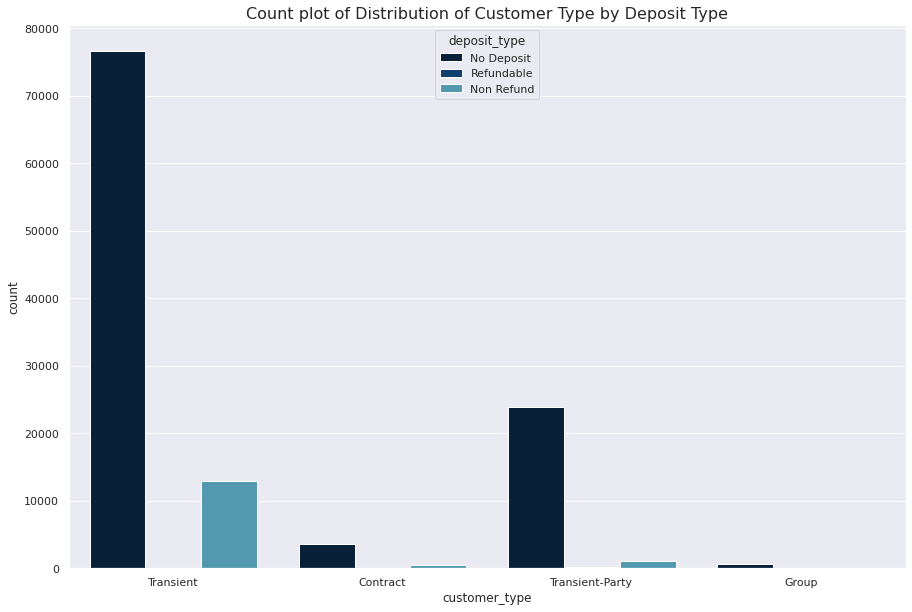

In [12]:
plt.figure(figsize = (15,10))
plt.title("Count plot of Distribution of Customer Type by Deposit Type", fontdict = {'fontsize':16})
ax = sns.countplot(x = "customer_type", hue = 'deposit_type', data = df, palette = 'ocean')

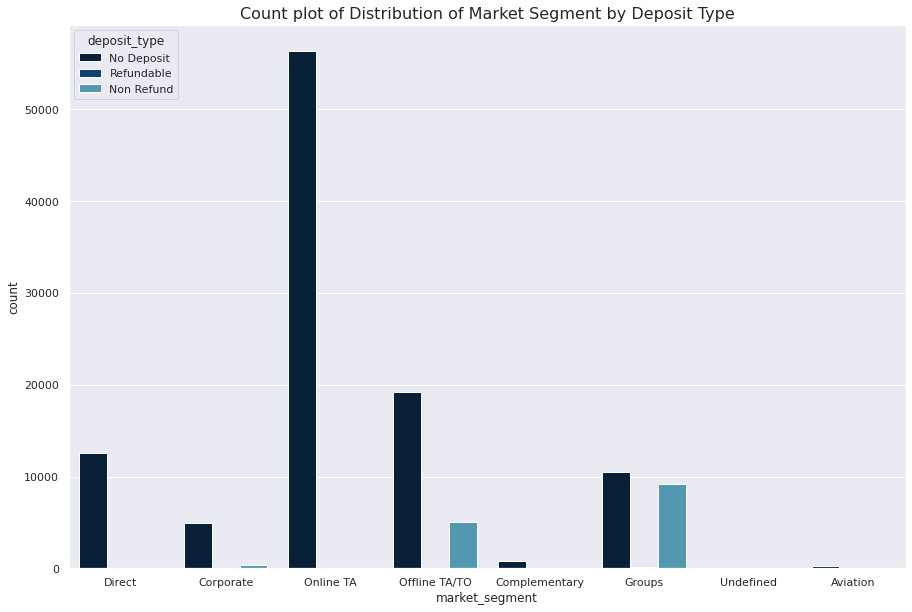

In [13]:
plt.figure(figsize = (15,10))
plt.title("Count plot of Distribution of Market Segment by Deposit Type", fontdict = {'fontsize':16})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df, palette = 'ocean')

Looking at these plots, most customers, and segments, do not give any deposits. (Or choose Hotels with deposits required). Only the "Groups" and "Offline TA/TO" Market segment seems to have a relatively higher distribution of Deposits taken.

**Now, let's move on to some visualizations related to our target variabele, "is_cancelled"**

### Count plot of Distribution of Customer Type, and Segment Type, by Cancellation

**Note:**

**0: Not Cancelled.**

**1: Cancelled.**

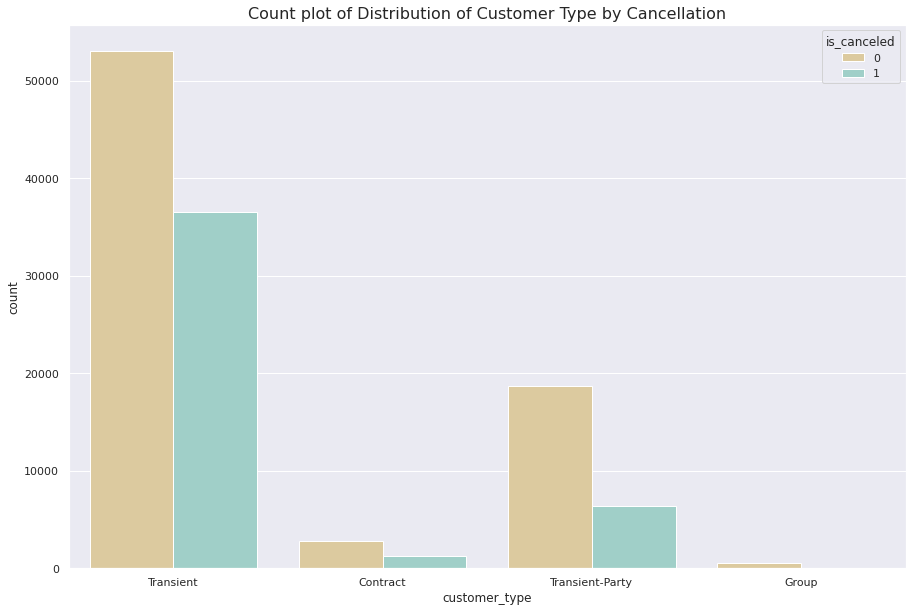

In [14]:
plt.figure(figsize = (15,10))
plt.title("Count plot of Distribution of Customer Type by Cancellation", fontdict = {'fontsize':16})
ax = sns.countplot(x = "customer_type", hue = 'is_canceled', data = df, palette= 'BrBG' )

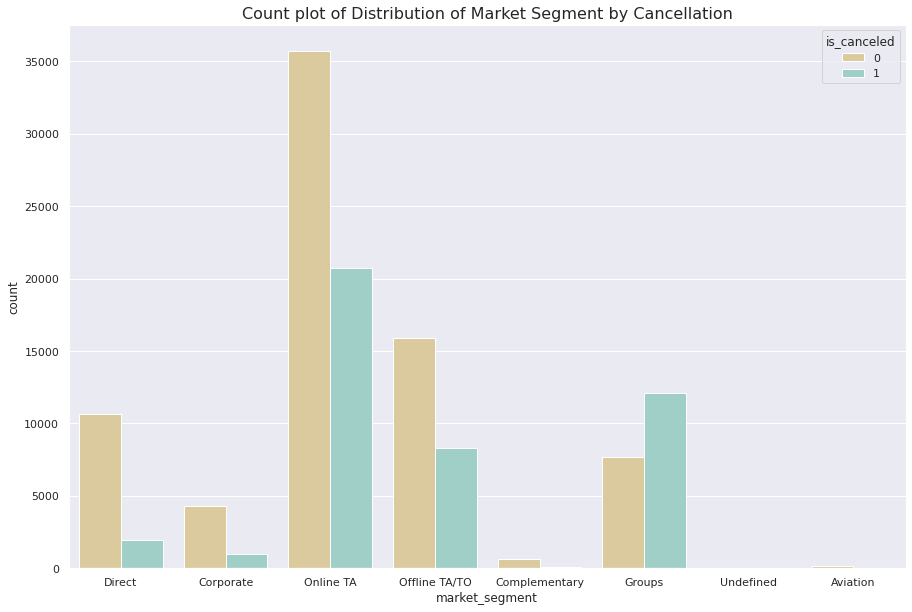

In [15]:
plt.figure(figsize = (15,10))
plt.title("Count plot of Distribution of Market Segment by Cancellation", fontdict = {'fontsize':16})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df, palette= 'BrBG' )

My first impression was, "The cancellation Rate is so high!" My second thought was, "Great, the data is not extremely imbalanced." My third thought was, "Awesome, this makes the cancellation problem pretty serious for those Hotels, and it would have a strong Real-World Application."

From this graph, we can see the Hotel owners would love people who Directly Communicate with them, or with the Corporate Segment of the market, and would especially hate Group Bookings Online. Of course, it seems that people who booked in Groups tend to require a Non-Refundable Deposit more often than other groups, so this is debatable. 



### Barplot for Cancellations by Repeated Guests.

**Note: For Repeated Guest Variable**
**0: Not Repeat Guest**
**1: Repeat Guest**

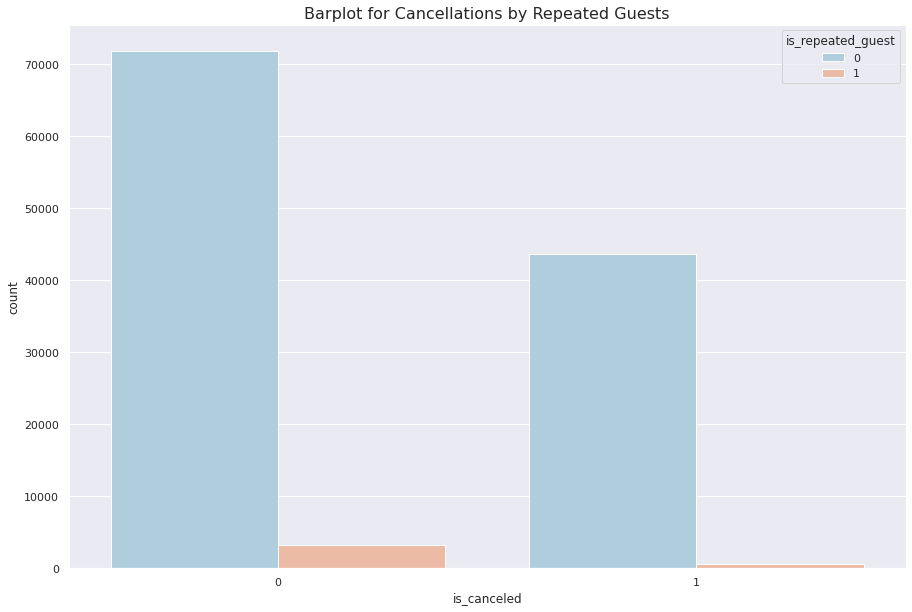

In [16]:
plt.figure(figsize = (15,10))
plt.title("Barplot for Cancellations by Repeated Guests", fontdict = {'fontsize':16})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df, palette = 'RdBu_r')

Proportionately, it is easy to see that repeat guests tend to not cancel as often as new guests. 

## Data Pre-Processing

Firstly, we make a copy of our original data frame to work with.

In [17]:
df2 = df.copy()

First order of business is to do something about missing values.

In [18]:
df2.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [19]:
df2.shape

(119390, 32)

Agent column and the company columns seem to have too many missing values. Although the agent columns has fewer missing values, it has a not insignificant correlation with our Target variable, it is for that reason that messing with imputation techniques and such might throw off our predictions.

Rows with missing values in country and children can be simply dropped, as they are an insignificant portion of our data.

In [20]:
df2 = df2.drop(['company','agent'], axis = 1)

In [21]:
df2 = df2.dropna()

In [22]:
df2.shape

(118898, 30)

Now, let's look at the correlations for a basic understanding. We will look at this more deeply later.

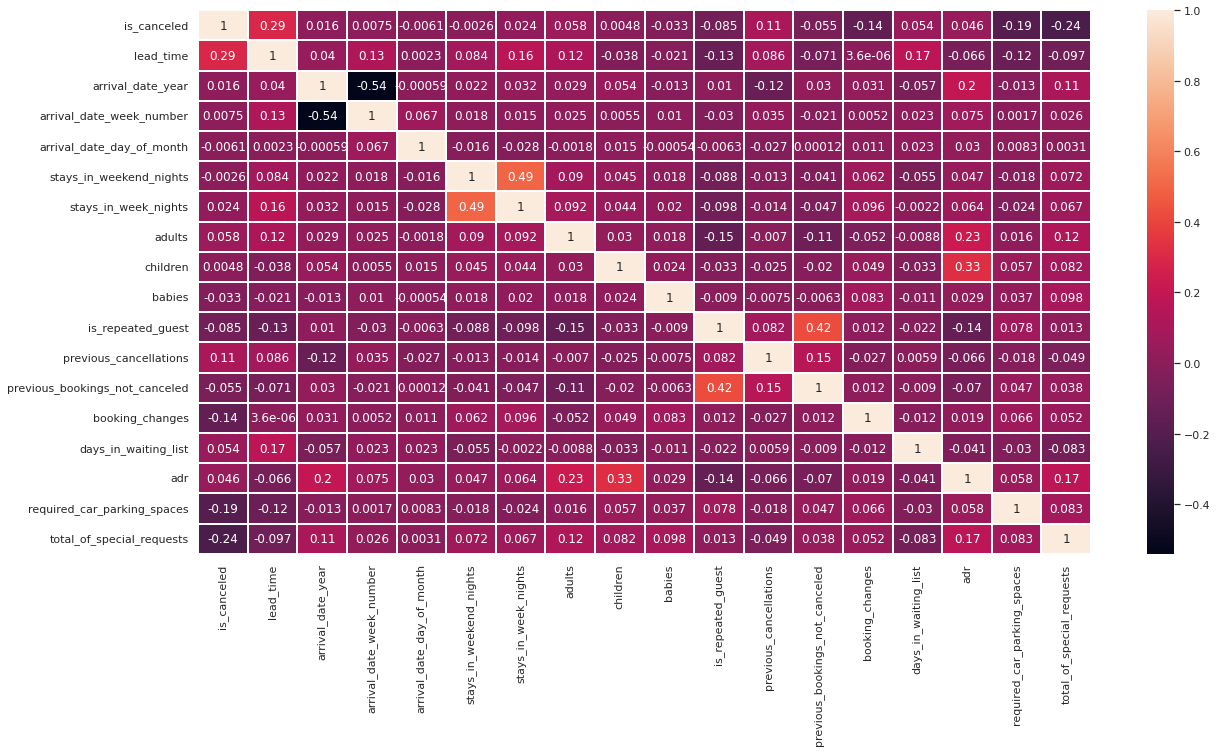

In [23]:
plt.figure(figsize = (20, 10))
corr = df2.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

Now, let's work on the features.

In [24]:
df2.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [25]:
le = LabelEncoder()

In [26]:
df2['meal'] = le.fit_transform(df2['meal'])
df2['distribution_channel'] = le.fit_transform(df2['distribution_channel'])
df2['reserved_room_type'] = le.fit_transform(df2['reserved_room_type'])
df2['assigned_room_type'] = le.fit_transform(df2['assigned_room_type'])
df2['hotel'] = le.fit_transform(df2['hotel'])
df2['customer_type'] = le.fit_transform(df2['customer_type'])
df2['reservation_status'] = le.fit_transform(df2['reservation_status'])
df2['market_segment'] = le.fit_transform(df2['market_segment'])
df2['country'] = le.fit_transform(df2['country'])
df2['deposit_type'] = le.fit_transform(df2['deposit_type'])
#The month part is done manually, as it has more meaning this way.
df2['arrival_date_month'] = df2['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [27]:
df2.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list              

In [28]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,2015-07-03


In [29]:
df2.corr()["is_canceled"].sort_values()

reservation_status               -0.917223
total_of_special_requests        -0.235643
required_car_parking_spaces      -0.194796
assigned_room_type               -0.175880
booking_changes                  -0.144659
hotel                            -0.133964
is_repeated_guest                -0.085179
customer_type                    -0.068768
reserved_room_type               -0.062230
previous_bookings_not_canceled   -0.055493
babies                           -0.032521
meal                             -0.018657
arrival_date_day_of_month        -0.006127
stays_in_weekend_nights          -0.002631
children                          0.004751
arrival_date_week_number          0.007465
arrival_date_month                0.010305
arrival_date_year                 0.016412
stays_in_week_nights              0.024110
adr                               0.046199
days_in_waiting_list              0.054016
market_segment                    0.056948
adults                            0.058381
previous_ca

Here, Reservation Status is extremely correlated, and it may cause overfitting, thus we will drop it. Also, I will remove the reservation status date here.

In [30]:
df2 = df2.drop(['reservation_status','reservation_status_date' ], axis = 1)

In [80]:
df2['country'].unique()

array([135,  59, 169,  51,  76,  56, 139, 124, 127,   6, 133,  43,  15,
        29,  34,  66,  81, 123,  46, 140, 154,  11,  52,  42,  25,  54,
       113,  27, 100, 153,   3,  75,  31, 107, 103, 166, 148, 101, 134,
       149,  30,  12,  23,  99, 162, 174,   1,  80,  40, 175,  37, 176,
        48,  91,  38,  72,   5, 161,  82,  71,  69,  77,  60,   4,  63,
       168,  83,  28,  41,  35,  61,  92, 121, 106, 171, 152,  55,  86,
       128,  73,  94, 131, 144, 155,  13,  20, 126, 158,  47, 108, 117,
         7,  85,  98,  39,  33,  22, 115,  36, 151, 165,  19,  32,  84,
       156, 145,  14, 142, 173, 132, 138,  50, 130, 110, 116,  49, 105,
        79, 170, 125,  21, 102, 157, 163,  44, 150,  90,  53,  78,  70,
       141,  88, 104,  18,  74, 159, 122,  16, 172, 164,  58,  62, 160,
        64,  87,  97,  65, 112, 167, 118,  57, 111, 129,  17,  95, 109,
       119,  24, 136,  26,   0,   2, 147,  45, 137,  68,  96,   9,  67,
         8, 114, 120,  89, 143,  10, 146,  93])

We tried removing this column altogether, but it seems to reduce our accuracies by about 2% across all the models we tested later!!

In [32]:
#df2 = df2.drop(['country'], axis = 1)

In [33]:
#Now, we can make dummies with one hot encoding.
df2 = pd.get_dummies(data = df2, columns = ['meal', 'market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type'])

In [34]:
df2.shape

(118898, 67)

In [35]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.30, random_state = 42)

Next 7 cells should be run if we want to unbias the data.

In [36]:
df3 = df2.copy()

In [37]:
df4 = df3.sort_values(['is_canceled'])

In [38]:
df5 = df4.reset_index().drop(['index'], axis=1)
df5 = df5[30000:]

In [39]:
df5 = df5.reset_index().drop(['index'],axis = 1)

In [40]:
df5.shape

(88898, 67)

In [41]:
df5['is_canceled'].value_counts()

0    44745
1    44153
Name: is_canceled, dtype: int64

In [42]:
y = df5["is_canceled"]
X = df5.drop(["is_canceled"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Predictive Models:

Since we are going to compare multiple models, it is worthwhile to make a function for comparing them. 

In [43]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

### Logistic Regression

The default lbfgs seems to perform worse, so we use liblinear.

In [44]:
print('Logistic Regression:')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Logistic Regression:
Accuracy Score: 0.8098987626546682

Confusion Matrix:
 [[11075  2403]
 [ 2667 10525]]


Now, we look for feature Importance here as per our discussion during the presentation.

In [45]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define the model
model1 = LogisticRegression(solver = 'liblinear')
# fit the model
model1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
y_pred = model1.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[i for i in model1.coef_[0]]})
fimp = feature_importance.sort_values('feature_importance',ascending=False)

Accuracy Score: 0.8098987626546682


In [47]:
fimp1 = fimp[0:5]
fimp2 = fimp[61:66]

In [48]:
fimp = fimp1.append(fimp2).reset_index()

In [49]:
fimp = fimp.drop(['index'], axis = 1)

<BarContainer object of 10 artists>

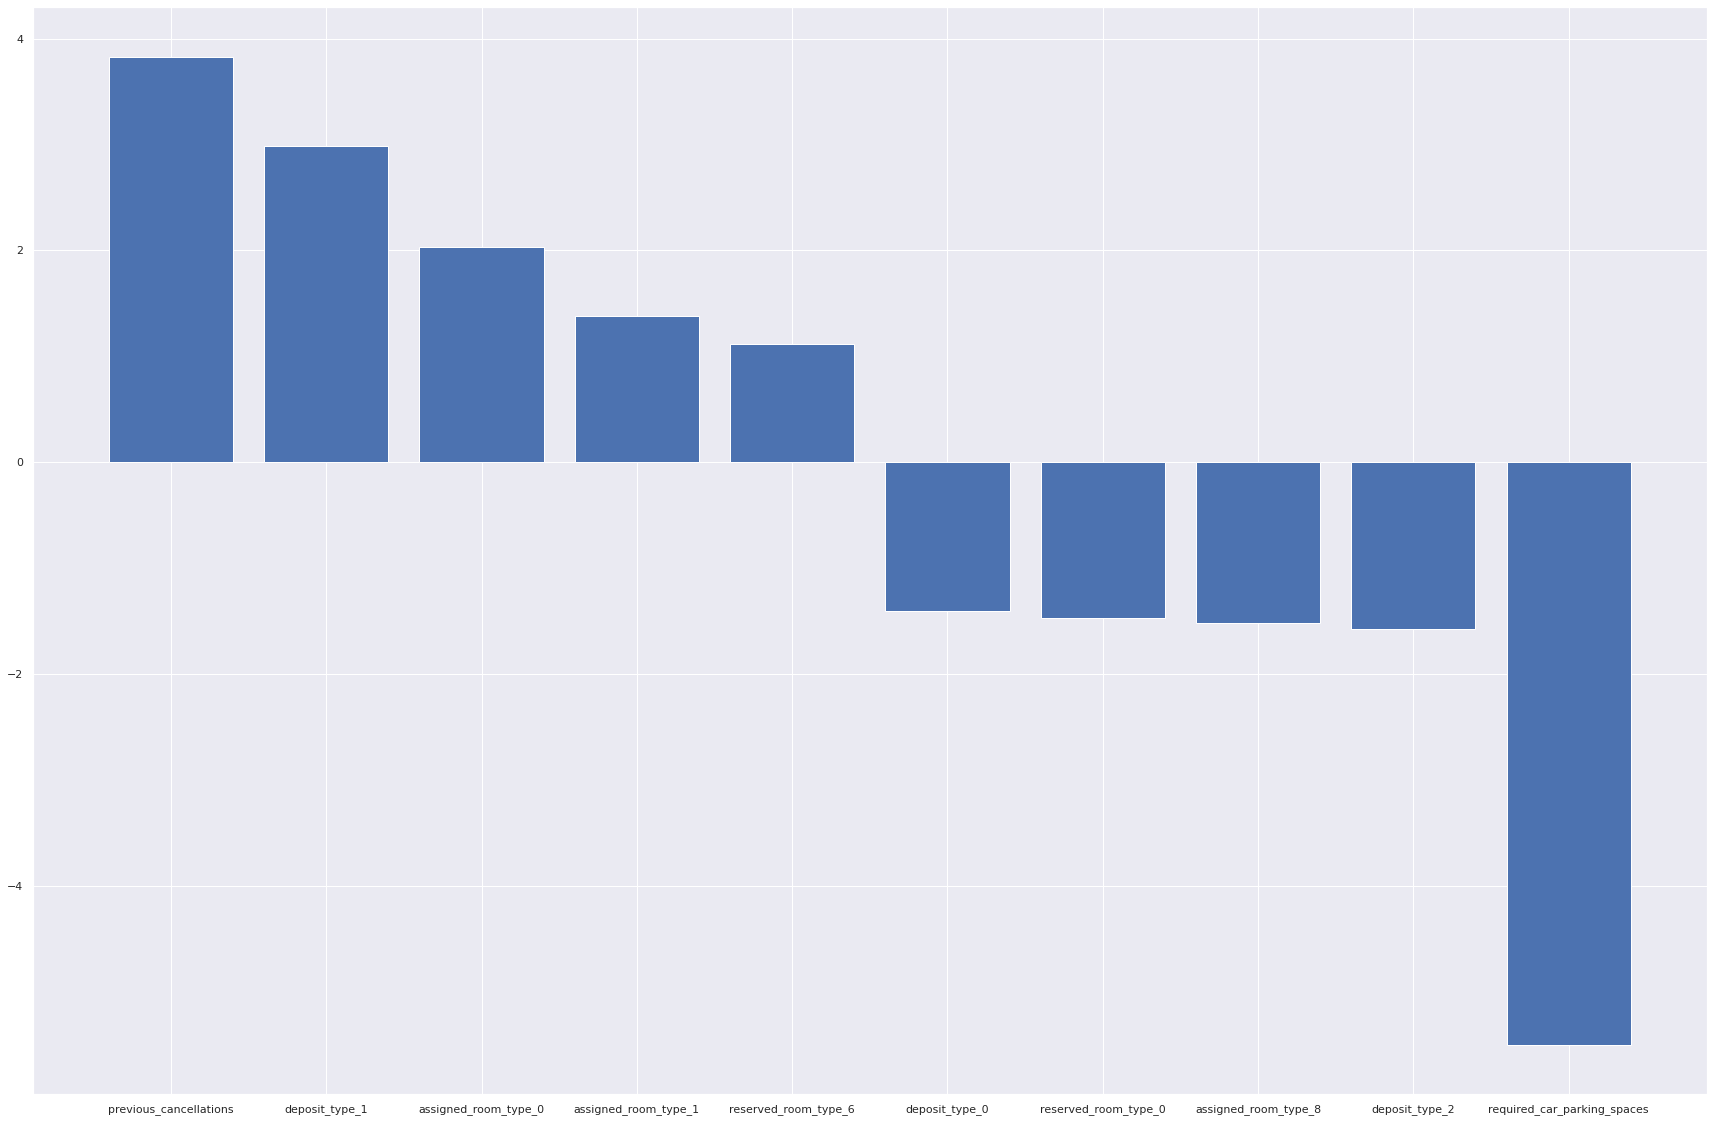

In [50]:
fig = plt.figure(figsize = (30, 20))
plt.bar(fimp['feature'], fimp['feature_importance'])

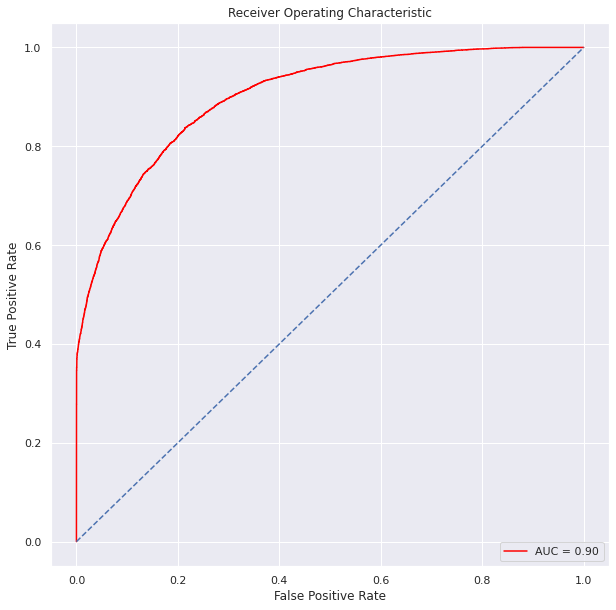

In [51]:
ROC(y_test, y_prob)

  ### Decision Tree

Multiple Max Depths were tried.

In [52]:
print('Decision Tree')
model(DecisionTreeClassifier(max_depth = 10), X_train, X_test, y_train, y_test)

Decision Tree
Accuracy Score: 0.8641919760029996

Confusion Matrix:
 [[12020  1458]
 [ 2164 11028]]


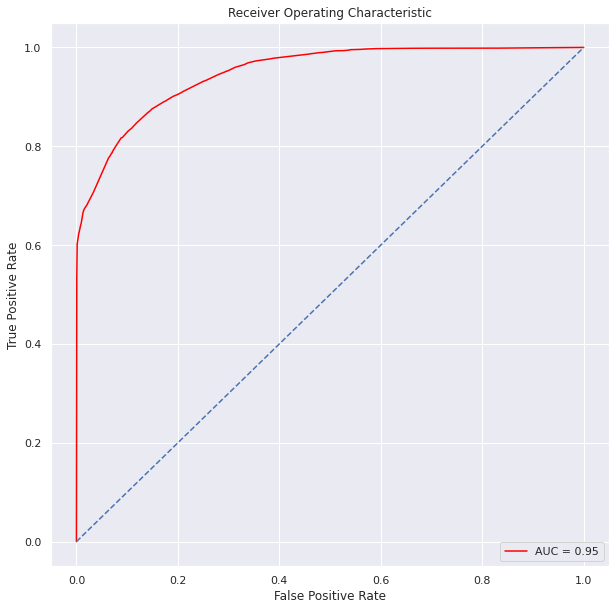

In [53]:
ROC(y_test, y_prob)

### Random Forest

In [54]:
print('Random Forest')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Random Forest
Accuracy Score: 0.9079865016872891

Confusion Matrix:
 [[12449  1029]
 [ 1425 11767]]


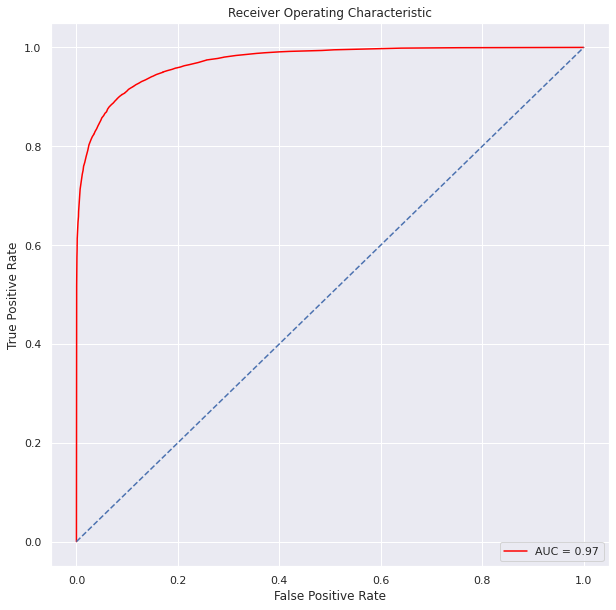

In [55]:
ROC(y_test, y_prob)

### XGBoost

In [56]:
print('XGBoost')
model(XGBClassifier(), X_train, X_test, y_train, y_test)

XGBoost
Accuracy Score: 0.8583802024746907

Confusion Matrix:
 [[11657  1821]
 [ 1956 11236]]


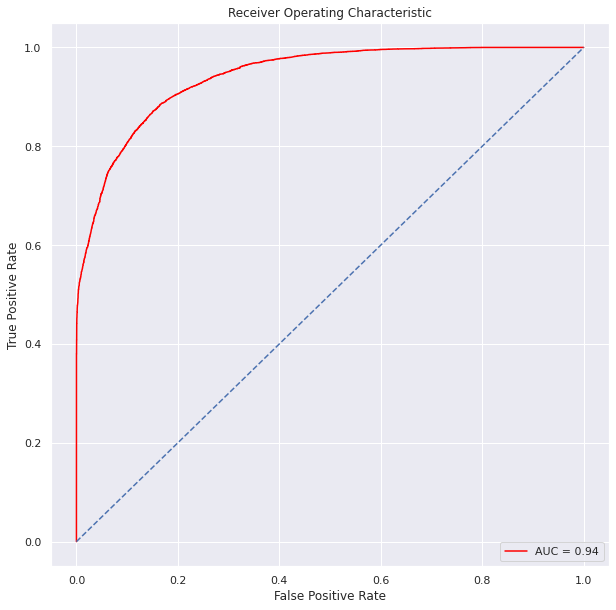

In [57]:
ROC(y_test, y_prob)

### Neural Network MLP

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [59]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
print('Neural Network')
model(MLPClassifier(), X_train_scaled, X_test_scaled, y_train, y_test)

Neural Network
Accuracy Score: 0.8725909261342332

Confusion Matrix:
 [[11986  1492]
 [ 1906 11286]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


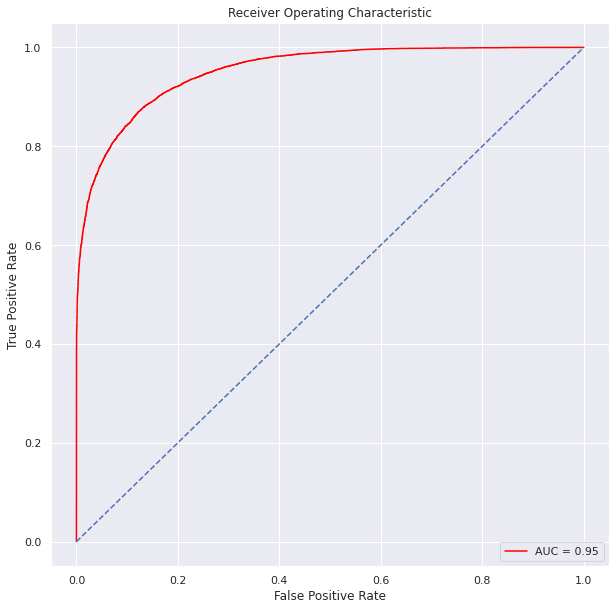

In [61]:
ROC(y_test, y_prob)

Tuned by trail and error. (And time, a lot of time)

In [62]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')

In [63]:
print('Neural Network Tuned')
model(mlpc_tuned, X_train_scaled, X_test_scaled, y_train, y_test)

Neural Network Tuned
Accuracy Score: 0.8850018747656543

Confusion Matrix:
 [[12067  1411]
 [ 1656 11536]]


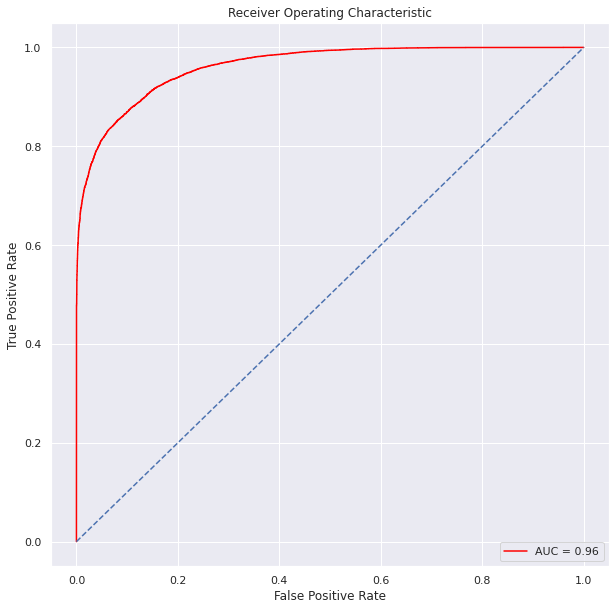

In [64]:
ROC(y_test, y_prob)

### Naive Bayes

In [65]:
print('Gaussian Naive Bayes')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Gaussian Naive Bayes
Accuracy Score: 0.6784026996625422

Confusion Matrix:
 [[ 6978  6500]
 [ 2077 11115]]


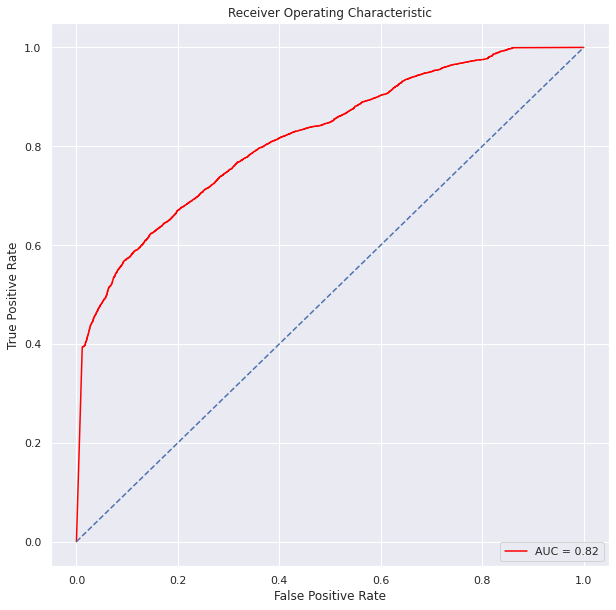

In [66]:
ROC(y_test, y_prob)

# Wrapping Up

## Model Performance Comparison

In [67]:
table = pd.DataFrame({"| Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "Neural Network", "Neural Network Tuned", "Naive Bayes"],
                     "| Biased Accuracy Scores": ["0.802", "0.834", "0.883", "0.838", "0.849","0.859", "0.590"],
                     "| Unbiased Accuracy Scores": ["0.810", "0.864", "0.908", "0.858", "0.877", "0.885", "0.678"],
                     "| Biased ROC Auc |": ["0.87", "0.91", "0.95", "0.92","0.93", "0.94","0.78"],
                     "| Unbiased ROC Auc |": ["0.90", "0.95", "0.97", "0.94","0.95", "0.96","0.82"]}
                     )
table = table.sort_values('| Unbiased Accuracy Scores', ascending = False)
print(table.to_string(index=False))

             | Model | Biased Accuracy Scores | Unbiased Accuracy Scores | Biased ROC Auc | | Unbiased ROC Auc |
       Random Forest                    0.883                      0.908               0.95                 0.97
Neural Network Tuned                    0.859                      0.885               0.94                 0.96
      Neural Network                    0.849                      0.877               0.93                 0.95
       Decision Tree                    0.834                      0.864               0.91                 0.95
             XGBoost                    0.838                      0.858               0.92                 0.94
 Logistic Regression                    0.802                      0.810               0.87                 0.90
         Naive Bayes                    0.590                      0.678               0.78                 0.82


Random Forest has the best Accuracy as well as the AUC score. CV was not taken over Neural Networks, as the calculation time even with TPU acceleration would be in multiple hours.

## Feature Importance for Random Forest.

Text(0.5, 0, 'Feature Importances (%)')

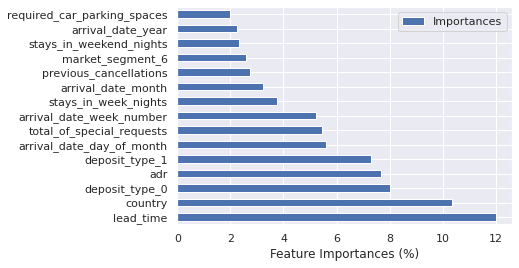

In [68]:
randf = RandomForestClassifier()
rf_model = randf.fit(X_train2, y_train2)

pd.DataFrame(data = rf_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train2.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "b")

plt.xlabel("Feature Importances (%)")

In [69]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

Important Features:

Lead Time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

Let's look at a visual to understand this better.

In [70]:
df3 = df2.copy()
df3 = df3[['is_canceled', 'lead_time']]

In [71]:
df3 = df3.groupby(by="lead_time").mean()

In [72]:
y = np.array([df3[0:100].mean().astype(float),df3[100:200].mean().astype(float),df3[200:300].mean().astype(float),df3[300:400].mean().astype(float),df3[400:500].mean().astype(float)])

In [73]:
x = np.array([0,1,2,3,4])

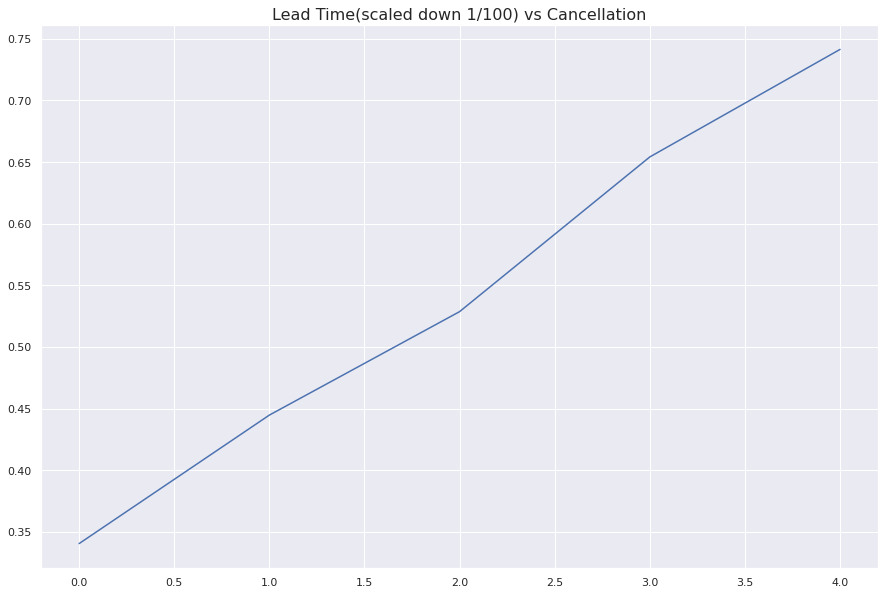

In [74]:
plt.figure(figsize = (15,10))
plt.title("Lead Time(scaled down 1/100) vs Cancellation", fontdict = {'fontsize':16})
plt.plot(x,y)

Clearly, there seems to be a rather linear relationship, which shows that on average, an increase in lead time leads to higher chance of cancellation.

Data Source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount
